<a href="https://colab.research.google.com/github/AhMedDa1/Graduation-Project/blob/main/Graduation_Project_fgsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**mount** **your** **drive**

# downloading some nacessary files


In [ ]:

!mkdir -p "images"

In [ ]:
# !pip install hiddenlayer
# !pip install graphviz
!wget "https://drive.google.com/uc?export=download&id=13_S2d6Wf_tR-vTSa-u4d-tmRgudcgyCH" -O "9920.pth.tar"
!wget "https://drive.google.com/uc?export=download&id=13OGRlOtx2QiapEJsmRiVKUleoK3PjXjB" -O model_mnist.py &> download.log


In [ ]:
import torchvision 
import numpy as np
import cv2

root  = "MNIST"
train = torchvision.datasets.MNIST(root, train=True, transform=None, target_transform=None, download=True)

for i in range(20):
  imag_data = np.array(train.data[i,:,:])
  lable = train.targets[i]
  cv2.imwrite("images/img_Number_{}_labled_{}.png".format(i,lable), imag_data )

**the** **code**

# the main code


In [ ]:
import torch  # pytorch   the framwork we use for the model and the optimizaing  
from torch.autograd import Variable
from torchvision import models
import torch.nn as nn
from torchvision import transforms

import numpy as np
import cv2

from model_mnist import Basic_CNN


from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

from os import listdir
from os.path import isfile, join
import ipywidgets as widgets
from IPython.display import Image

#plt.style.use('dark_background')



In [ ]:

#@markdown <center><h1>set the image size</h1></center><br>
#@markdown <center><h5>28-100</h5></center><br>


IMG_SIZE = 53  #@param {type: "slider", min: 28, max: 100}
#device = "cpu" #@param ["cpu","cuda"] {allow-input: false}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#@markdown ---


In [ ]:
#/images
#@markdown <center><h1>set the image to be altere</h1></center><br>


mypath = "images"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles



images_list = widgets.SelectMultiple(options=onlyfiles,rows=10)


@widgets.interact(symbols=images_list)
def render(symbols):
  global image_path
  try:
    selected = symbols[0]
    image_path = join(mypath, selected)
    return Image(filename=image_path,width= 150, height= 150)
  except:
    print("select an image to exploite:")

  
 

interactive(children=(SelectMultiple(description='symbols', options=('img_Number_16_labled_2.png', 'img_Number…

In [ ]:
print(image_path)

images/img_20.jpg


In [ ]:
# load image and reshape to (3, 224, 224) and RGB (not BGR)
# preprocess as described here: http://pytorch.org/docs/master/torchvision/models.html
orig = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
orig = cv2.resize(orig, (IMG_SIZE, IMG_SIZE)) ################
img = orig.copy().astype(np.float32)  # نسخ الصوره ك مصفوفه
perturbation = np.empty_like(orig)  # عمل مصفوفه (صوره) التشويش بنفس حجم الصوره الاصليه
# perturbation = np.zeros_like(orig)  # عمل مصفوفه (صوره) التشويش بنفس حجم الصوره الاصليه

# normalizing the img
mean = [0.5]
std = [0.5]
img /= 255.0
img = (img - mean)/std



In [ ]:
img.shape

(28, 28)

In [ ]:
# load model
#@markdown <br><center><img src="https://lh3.googleusercontent.com/fife/ABSRlIppXSyEhpcDatHsaCMiNTtBy_ZKLTWnkD4Yk6S7NQPtG7VlpIdTx0SQZtsUFxlWEjuft2SJU3jt_2HRKskUABSa8QHMQXIgx_jk7gt0c9nHLdqD-qoR22d9r1KSxZ2LtcfMXI4oCJoq5p3_-3k_m-G7HimvnaSksZSbYyGaLoszKuWAK07_i9nHndGzMHFTZPH453QwNSD_0q_Yml1a9YjXOGX4SXH0hI9NGOt9uwRS-Tr7IA9enlFp1-eeOEg42zRsBZE-b7pKGRmpeD6GBo4XE6A1V76LhCMk_RYM5PtVohBA0lt4OCejWvkMrQDGNtRO-3xX7QEtAxbnXoLFgWaJqDrwQm2Ozc2JVmduT_HDx66eFzyjFJg5bWRjSee3pHHCuxx4fGyoAexK_395i9-lnVx0L_3c8_V_NVQoOsJ4_Q_MFt-4Ihv9ttDF8K_PEgzg_yV4Wt2cTUeyV9N-NJ-xibiTbWUQehTWHCLdsegJL_EdC1cuv5K1pnZ8jWS2Z3Ctzq_qrKTJ-5awtnJXUfK2okJmWv-2mwIb3eNiU7hfp2PAAJZYtvRM8TvT9WOsTlOwcyUt6qR4AutyfMuRFsTpHRoAg60lYl1Jch-6S4DLDakdARdirmmXHkp6BFc7Y8dr6usYM9Y0Xr-KFeV7gEnv9vIAJYGc2Lf3h5jptAvvGn91AEUX81m27sHyRzYb1PS3fGiJPHWWneSg4Kcyu8WsIn4VSFfZA4c=w1326-h637-ft"  alt="the model"  height="400" width="1000" /></img></center>
# import hiddenlayer as hl

model = Basic_CNN(1, 10)
saved = torch.load('9920.pth.tar', map_location='cpu')
model.load_state_dict(saved['state_dict'])
model.eval()

criterion = nn.CrossEntropyLoss() # -y * log(y_hat) - (1-y) * log(1-y_hat)

# mod = Basic_CNN(1, 10)
# x = torch.randn( 1,1,28,28)

# hl.build_graph(mod, x)
model

Basic_CNN(
  (conv1_1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

((kernel_size)*stride+1)*filters)
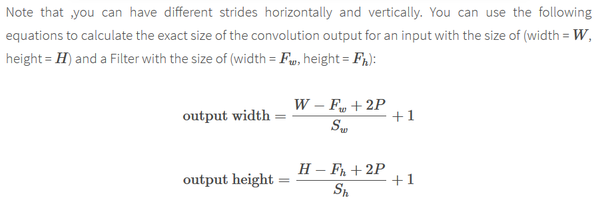

In [ ]:


# prediction before attack
inp = Variable(torch.from_numpy(img).to(device).float().unsqueeze(0).unsqueeze(0), requires_grad=True)
orig = torch.from_numpy(img).float().to(device).unsqueeze(0)


out = model(inp)
org_out =out.data.cpu().numpy()
pred = np.argmax(out.data.cpu().numpy())



print('Prediction before attack: %s' %(pred))
org_out

Prediction before attack: 6


In [ ]:

# get trackbar position
eps = 150

inp = Variable(torch.from_numpy(img).to(device).float().unsqueeze(0).unsqueeze(0), requires_grad=True)


out = model(inp)

loss = criterion(out, Variable(torch.Tensor([float(pred)]).to(device).long()))
# compute gradients
loss.backward()


# the FGSM equation
inp.data = inp.data + ((eps/255.0) * torch.sign(inp.grad.data)) ## optimization funtion// 
inp.data = inp.data.clamp(min=-1, max=1)
#inp.grad.data.zero_() # unnecessary
# predict on the adversarial image
adv_out =model(inp).data.cpu().numpy()
pred_adv = np.argmax(adv_out)
print("_"*60) # to clear previous line, not an elegant way
print("After attack: eps {} \{}".format(eps, pred_adv))#, end='\r')#'eps:', eps, end='\r')
print("_"*60)


____________________________________________________________
After attack: eps 150 \6
____________________________________________________________


In [ ]:
ort_out, adv_out

____________________________________________________________
After attack: eps 50 \6
____________________________________________________________


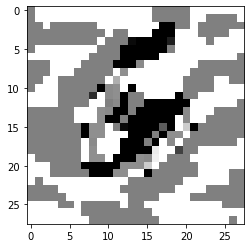

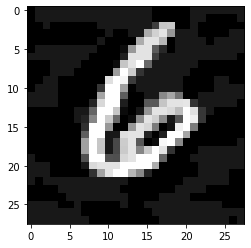

'e' exit / 's' safee
break


In [ ]:


# deprocess image
adv = inp.data.cpu().numpy()[0][0]
perturbation = adv-img
adv = (adv * std) + mean
adv = adv * 255.0
adv = np.clip(adv, 0, 255).astype(np.uint8)
# perturbation = perturbation*255
# perturbation = np.clip(perturbation, 0, 255).astype(np.uint8)



# display images
plt.imshow(perturbation, cmap="gray")
plt.show()

plt.imshow(adv, cmap="gray")
plt.show()

key = input("'e' exit / 's' safe")
if key == 'e':
    print("break")
elif key == 's':
    cv2.imwrite('img_adv.png', adv)
    cv2.imwrite('perturbation.png', perturbation)
    # break



In [ ]:
adv = cv2.imread("/content/adv_7.png", cv2.IMREAD_GRAYSCALE)

inp = Variable(torch.from_numpy(adv).to(device).float().unsqueeze(0).unsqueeze(0), requires_grad=True)
pred_adv = np.argmax(model(inp).data.cpu().numpy())

In [ ]:
perturbation * 255

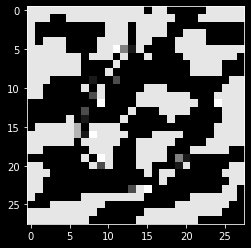

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import display
import PIL

an_image = PIL.Image.open("perturbation.png")

grayscale_image = an_image.convert("L")
grayscale_array = np.asarray(grayscale_image)

plt.imshow(grayscale_array, cmap="gray")

In [ ]:
from torchvision.transforms import ToPILImage
from IPython.display import Image
to_img = ToPILImage()

# display tensor
a = t.Tensor(3, 64, 64).normal_()
to_img(a)

In [ ]:
from IPython.display import Image
import ipywidgets as widgets
from IPython.display import display

img1=Image(filename='perturbation.png',width=400, height= 400)
img2=Image(filename='img_adv.png',width= 250, height= 250)

# output = widgets.Output()

# display(img1, output)
# #display(img2, output)

# with output:
#     print("changed key = 'e'")
#     #display(img1, output)
#     #display(img2, output)
img1

In [ ]:
perturbation

In [ ]:
from google.colab import files

files.download('perturbation.png')

In [ ]:
imge=Image(filename='perturbation.png',width= 400, height= 400)


display(output)